In [1]:
# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 2. Load vectorized data
X = pd.read_csv("data/processed/vectorized_text.csv")
y = pd.read_csv("data/processed/labels.csv")

# Ensure shape matches
assert len(X) == len(y), "Mismatch in features and labels"


In [3]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)


In [9]:
# 4. Train baseline models 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results[name] = {"Accuracy": acc, "F1 Score": f1}
    print(f"📌 {name}\n")
    print(classification_report(y_test, preds))
    print("-" * 50)


📌 Logistic Regression

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      8625
           1       0.96      0.94      0.95      7809

    accuracy                           0.95     16434
   macro avg       0.95      0.95      0.95     16434
weighted avg       0.95      0.95      0.95     16434

--------------------------------------------------
📌 Random Forest

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8625
           1       0.98      0.94      0.96      7809

    accuracy                           0.96     16434
   macro avg       0.96      0.96      0.96     16434
weighted avg       0.96      0.96      0.96     16434

--------------------------------------------------
📌 Naive Bayes

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      8625
           1       0.86      0.89      0.87      7809

    accuracy             

In [10]:
# 5. Compare model performance
results_df = pd.DataFrame(results).T
display(results_df)


,Accuracy,F1 Score
Logistic Regression,0.950103,0.947022
Random Forest,0.958744,0.955651
Naive Bayes,0.878788,0.874369


In [5]:
# 4. Train baseline models for overfitting and underfitting testing
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    preds = model.predict(X_train)
    acc = accuracy_score(y_train, preds)
    f1 = f1_score(y_train, preds)
    results[name] = {"Accuracy": acc, "F1 Score": f1}
    print(f"📌 {name}\n")
    print(classification_report(y_train, preds))
    print("-" * 50)

📌 Logistic Regression

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     20125
           1       0.97      0.95      0.96     18218

    accuracy                           0.96     38343
   macro avg       0.96      0.96      0.96     38343
weighted avg       0.96      0.96      0.96     38343

--------------------------------------------------
📌 Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20125
           1       1.00      1.00      1.00     18218

    accuracy                           1.00     38343
   macro avg       1.00      1.00      1.00     38343
weighted avg       1.00      1.00      1.00     38343

--------------------------------------------------
📌 Naive Bayes

              precision    recall  f1-score   support

           0       0.91      0.88      0.89     20125
           1       0.87      0.90      0.88     18218

    accuracy             

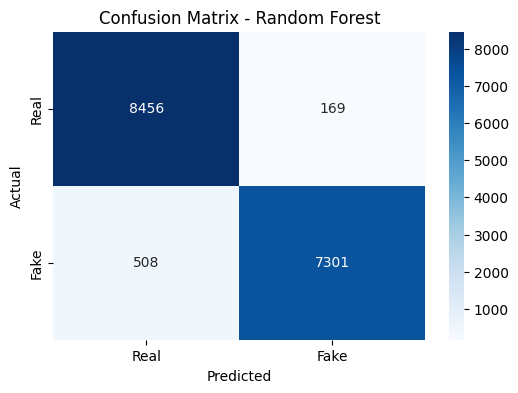

In [8]:
# 6. Plot confusion matrix for the best model (example: Logistic Regression)
best_model = models["Random Forest"]
preds = best_model.predict(X_test)
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
